In [1]:
!git clone https://github.com/Liuhong99/Sophia.git

Cloning into 'Sophia'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 134 (delta 11), reused 10 (delta 10), pack-reused 120
Receiving objects: 100% (134/134), 199.92 KiB | 2.94 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [2]:
%load Sophia/sophia.py

In [5]:
!cp Sophia/sophia.py /content

In [21]:
from sophia import SophiaG

In [69]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

#Training Adam and Sophia

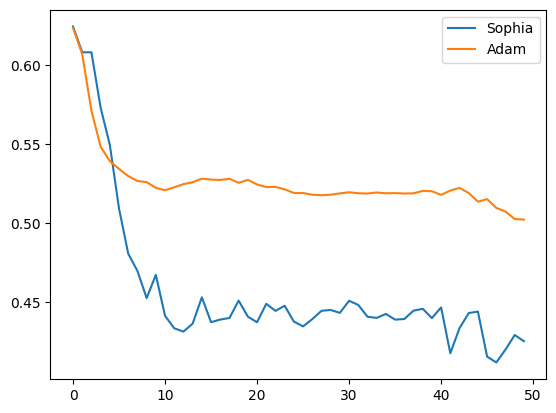

Accuracy Adam: 0.7317708134651184
Accuracy Sophia: 0.6510416865348816


In [97]:
n_epochs = 50
batch_size = 10
torch.manual_seed(2)
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# define the model
modelAdam = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

# define the model
modelSophia = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizerAdam = optim.Adam(modelAdam.parameters(), lr=0.001)
loss_Adam = []

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = modelAdam(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizerAdam.zero_grad()
        loss.backward()
        optimizerAdam.step()
    loss_Adam.append(loss.tolist())

# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizerSophia = SophiaG(modelSophia.parameters(), lr=0.001, betas=(0.95, 0.99), rho = 0.5, weight_decay=0.1)
loss_Sophia = []

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = modelSophia(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizerSophia.zero_grad()
        loss.backward()
        optimizerSophia.step()
    loss_Sophia.append(loss.tolist())

import matplotlib.pyplot as plt
x_r = range(len(loss_Sophia))
plt.plot(x_r,loss_Sophia,label="Sophia")
plt.plot(x_r,loss_Adam,label="Adam")
plt.legend()
plt.show()

# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = modelAdam(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy Adam: {accuracy}")

with torch.no_grad():
    y_pred = modelSophia(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy Sophia: {accuracy}")